<a href="https://colab.research.google.com/github/gargi510/LoanTap-Default-Prediction-Logistic-Regression/blob/main/LoanTap_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and Data

## About LoanTap

LoanTap is a fintech platform catering to millennials and salaried professionals by offering fast, flexible, and personalized credit solutions. Its digital-first approach enables seamless lending experiences through innovative financial products such as:

- Personal Loans  
- EMI-Free Loans  
- Advance Salary Loans  
- Overdrafts



## Problem Statement

To strengthen its credit risk evaluation framework, LoanTap aims to predict the likelihood of loan default among personal loan applicants.

The goal is to develop a machine learning classification model that assesses applicant creditworthiness. This predictive solution will empower LoanTap to:

- Make more informed underwriting decisions  
- Minimize Non-Performing Assets (NPAs)  
- Improve portfolio quality and operational efficiency


## Project Goals

- **Data Preparation and Cleaning**  
  Address missing values, standardize formats, and ensure feature consistency.

- **Exploratory Data Analysis (EDA)**  
  Understand feature distributions, detect outliers, and explore inter-feature relationships.

- **Feature Engineering**  
  Create meaningful variables and risk indicators, such as:  
  - Bankruptcy flags  
  - Public record presence  
  - Debt-to-Income (DTI) ratio

- **Model Development**  
  Build a Logistic Regression model to classify applicants as likely to repay or default.

- **Model Evaluation**  
  Assess model performance using:  
  - ROC-AUC score  
  - Precision, Recall, and F1-score  
  - Classification Report

- **Business Recommendations**  
  Provide actionable insights to strengthen LoanTap’s underwriting process and reduce default risk.


## Modeling Approach: Binary Logistic Regression

We will use **binary logistic regression** to model the probability of loan default (`loan_status` = 1) versus fully paid loans (`loan_status` = 0).

- Logistic regression is well-suited for **binary classification** problems, providing interpretable coefficients that explain how each feature affects default risk.
- It produces **probability scores**, allowing flexible decision thresholds tailored to business risk tolerance.
- The model is **computationally efficient** and robust, making it practical for large-scale loan portfolios.
- Its **transparency and explainability** are valuable for regulatory compliance and stakeholder communication in credit risk.


# Importing and Inspecting Data

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [347]:
df = pd.read_csv('/content/logistic_regression.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [348]:
df.shape

(396030, 27)

In [349]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

- The dataset contains **396,030 rows** and **27 columns**.
- Each row represents a loan application.
- The features include numeric values (e.g., `loan_amnt`, `int_rate`, `annual_inc`), categorical fields (e.g., `grade`, `term`, `purpose`), and textual fields (e.g., `emp_title`, `title`, `address`).

# Statistic Summary

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [351]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### Column Summary
The dataset includes approximately 12 numerical features, around 15 categorical features, and 2 date fields that will be converted to datetime format for analysis.

**Numerical Features:**  
Examples include `loan_amnt`, `int_rate`, `installment`, `annual_inc`, `dti`, `revol_bal`, and `revol_util`.

**Categorical Features:**  
Examples include `term`, `grade`, `sub_grade`, `emp_title`, `emp_length`, `home_ownership`, `purpose`, and `verification_status`.

**Date Features:**  
`issue_d` and `earliest_cr_line` are currently stored as objects and will be converted to datetime types.



### Missing Values Summary

| Column Name           | Non-Null Count | Missing Count | Description                                 |
|-----------------------|----------------|---------------|---------------------------------------------|
| emp_title             | 373,103        | ~22,927       | Employment title (free-text field)           |
| emp_length            | 377,729        | ~18,301       | Length of employment                         |
| title                 | 394,274        | ~1,756        | Loan title (free-text, similar to purpose)  |
| revol_util            | 395,754        | ~276          | Revolving credit utilization ratio           |
| mort_acc              | 358,235        | ~37,795       | Number of mortgage accounts                  |
| pub_rec_bankruptcies  | 395,495        | ~535          | Public record of bankruptcies                |

- Free-text fields such as `emp_title`, `title`, and `address` have high cardinality and will require preprocessing.
- `emp_length` is categorical but stored as an object; it will need cleaning and mapping to meaningful numeric categories.
- Missing values in `revol_util`, `mort_acc`, and `pub_rec_bankruptcies` may require imputation.
- Date columns `issue_d` and `earliest_cr_line` will be converted to datetime for temporal analysis.

##Target Variable Summary

In [352]:
loan_status_percent = df['loan_status'].value_counts(normalize=True) * 100

print("Loan Status Distribution (in %):")
print(loan_status_percent.round(2))

Loan Status Distribution (in %):
loan_status
Fully Paid     80.39
Charged Off    19.61
Name: proportion, dtype: float64


### Class Imbalance

- The dataset exhibits significant class imbalance, with approximately **80% Fully Paid** and **20% Charged Off (defaulted)** loans.
- This imbalance poses challenges since many machine learning algorithms assume balanced classes and may bias predictions toward the majority class.
- A naive model predicting all loans as "Fully Paid" would achieve 80% accuracy but fail to identify default cases, which is critical for effective credit risk assessment.
- Misclassifying defaults can lead to substantial financial losses and increased Non-Performing Assets (NPAs).
- To address this, the target variable is converted to binary form (`0` = Fully Paid, `1` = Default) for modeling.


In [353]:
df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# Initial EDA

In this section, we begin by analyzing high-cardinality categorical features such as `address` (geography) and `emp_title` (employment title), given their potential impact on the model.

- **Geography (`address`)**:  
  We explore the distribution of borrowers by geographic location to assess whether regional patterns influence loan repayment behavior. Due to the high cardinality of this feature, we also evaluate its importance in preliminary models to decide if dimensionality reduction or exclusion is appropriate.

- **Employment Title (`emp_title`)**:  
  As a free-text field with many unique values, `emp_title` requires careful consideration. We analyze its frequency distribution and assess its predictive power before determining whether to include it as-is, group similar titles, or exclude it from the final model.

Following this, we analyze the distribution and category counts of the remaining categorical variables to identify dominant categories, class imbalances, and missing values that may affect modeling.


## Analyzing Geography Field

The `address` field contains borrower residential addresses with embedded ZIP codes. To analyze geographic patterns, we extract ZIP codes from the address strings and map them to their respective states.

This approach enables us to:
- Aggregate borrower data at the state level,
- Identify regional variations in loan default rates,
- Evaluate whether geography contributes meaningful predictive power for the model.


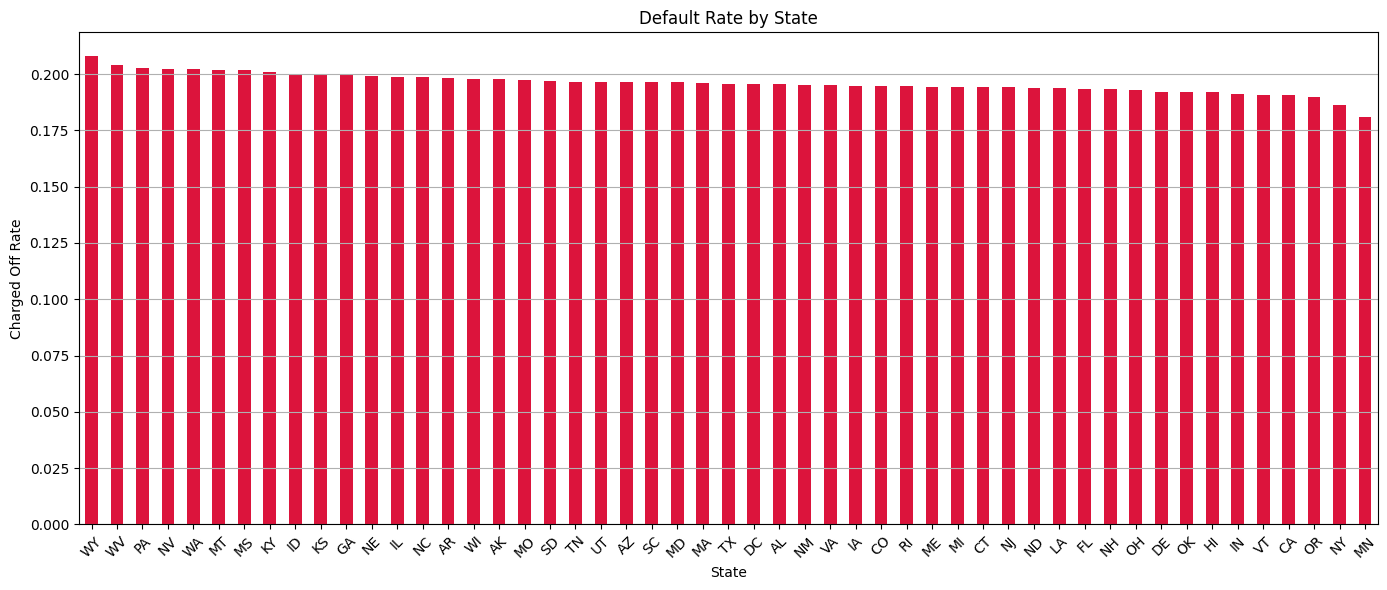

Top 5 states with highest default rates:
state
WY    0.208135
WV    0.204061
PA    0.202784
NV    0.202472
WA    0.202175
Name: loan_status, dtype: float64

Top 5 states with lowest default rates:
state
VT    0.190578
CA    0.190490
OR    0.189620
NY    0.186465
MN    0.180910
Name: loan_status, dtype: float64
Number of missing values in 'state': 42384


In [354]:
# Extract state from address
df['state'] = df['address'].str.extract(r',\s*([A-Z]{2})\s*\d{5}$')

# Calculate default rate by state
state_default_rate = df.groupby('state')['loan_status'].mean().sort_values(ascending=False)

# Plot default rate by state
plt.figure(figsize=(14, 6))
state_default_rate.plot(kind='bar', color='crimson')
plt.title('Default Rate by State')
plt.ylabel('Charged Off Rate')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Top risky and safe states
print("Top 5 states with highest default rates:")
print(state_default_rate.head())

print("\nTop 5 states with lowest default rates:")
print(state_default_rate.tail())

#Missing values
missing_states = df['state'].isna().sum()
print(f"Number of missing values in 'state': {missing_states}")


#### Top 5 States with Highest Default Rates:
- **Wyoming (WY):** 20.8%
- **West Virginia (WV):** 20.4%
- **Pennsylvania (PA):** 20.3%
- **Nevada (NV):** 20.2%
- **Washington (WA):** 20.2%

#### Top 5 States with Lowest Default Rates:
- **Vermont (VT):** 19.1%
- **California (CA):** 19.0%
- **Oregon (OR):** 18.9%
- **New York (NY):** 18.6%
- **Minnesota (MN):** 18.1%

#### Missing Data:
- The `state` column contains approximately **42,384 missing values (~10.7%)**.

While the variation in default rates across states is modest—ranging from approximately 18% to 21%—some states exhibit slightly elevated risk levels. These differences may reflect regional economic factors, demographic characteristics, or credit behavior variations.

Since state information was successfully extracted for about 90% of records, we will conduct a chi-square test on a contingency table (excluding missing state values) to examine the association between state and loan status.

The results will help determine whether geographic location should be included as a feature in the predictive model.


In [355]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency = pd.crosstab(df['state'], df['loan_status'])

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f'Chi-square p-value for state vs loan_status: {p}')


Chi-square p-value for state vs loan_status: 0.6233795169668621


The chi-square test yielded a p-value of 0.65, which exceeds the conventional significance level of 0.05. This indicates that there is **no statistically significant association** between the borrower's state of residence and their loan repayment status.

In practical terms, geographic location at the state level does not meaningfully influence the likelihood of loan default or repayment in this dataset. Consequently, including the state feature in the predictive model is unlikely to enhance its performance. Excluding this feature can help reduce model complexity without sacrificing accuracy.

In [356]:
df.drop(columns=['state'], inplace=True)

## Analyzing Employement Title Field

The `emp_title` field contains many unique and inconsistently formatted job titles. Due to its high cardinality, we analyze its frequency distribution and default rates to assess its predictive value. This will help decide whether to clean, group, or exclude this feature from the model.

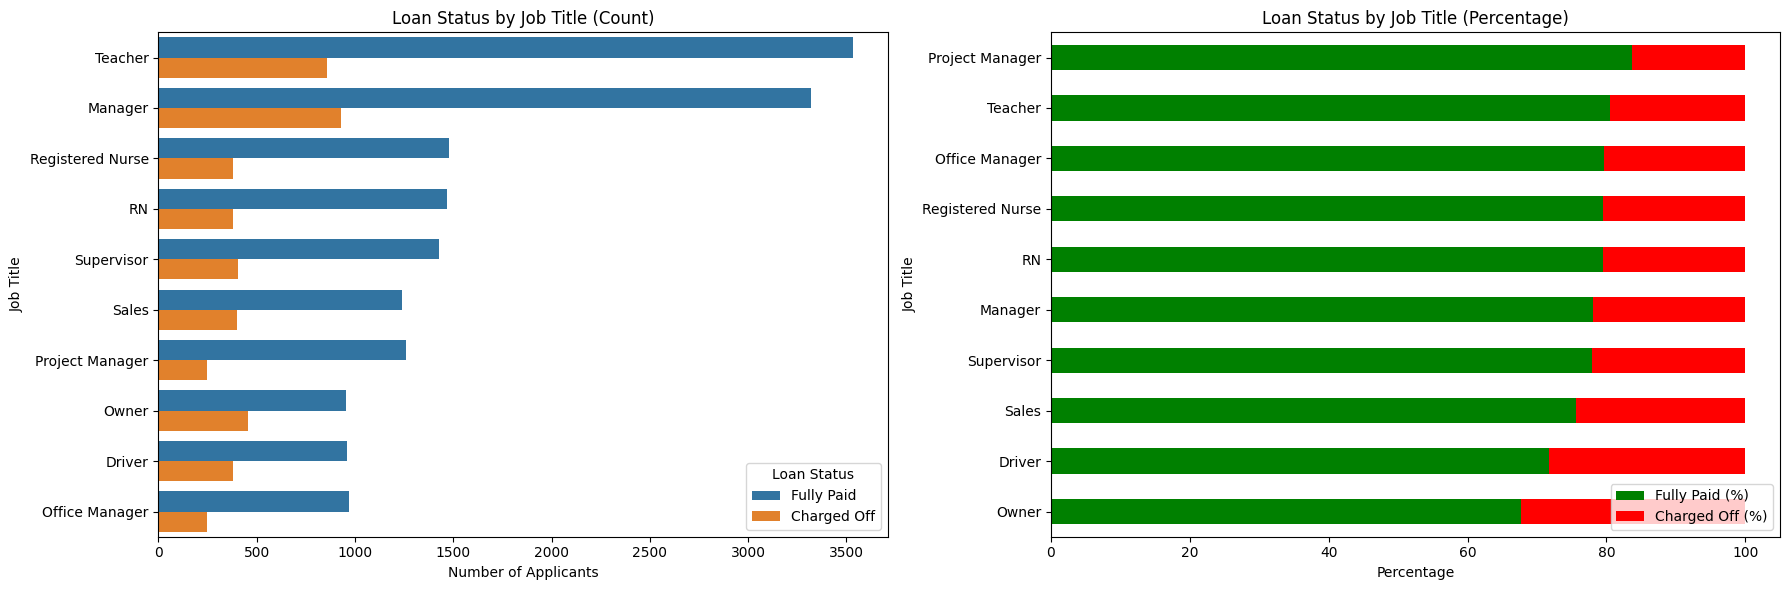

In [357]:

top_titles = df['emp_title'].value_counts().head(10).index


df_top_titles = df[df['emp_title'].isin(top_titles)]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# ---- Plot A: Count Plot ----
sns.countplot(data=df_top_titles, y='emp_title', hue='loan_status',
              order=top_titles, ax=axes[0])
axes[0].set_title("Loan Status by Job Title (Count)")
axes[0].set_xlabel("Number of Applicants")
axes[0].set_ylabel("Job Title")
axes[0].legend(title='Loan Status', labels=['Fully Paid', 'Charged Off'])

# ---- Plot B: Percentage Plot ----
job_pct = pd.crosstab(df_top_titles['emp_title'], df_top_titles['loan_status'], normalize='index') * 100
job_pct.columns = ['Fully Paid (%)', 'Charged Off (%)']
job_pct.sort_values(by='Charged Off (%)', ascending=False).plot(kind='barh',
        stacked=True, ax=axes[1], color=['green', 'red'])
axes[1].set_title("Loan Status by Job Title (Percentage)")
axes[1].set_xlabel("Percentage")
axes[1].set_ylabel("Job Title")
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


Two bar charts were created to analyze loan status across the top 10 job titles by applicant count.

- The **count plot** shows that “Teacher” and “Manager” have the highest number of loan applicants, with a large volume of both fully paid and charged-off loans.
- The **percentage plot** reveals the proportion of defaults within each job title:
  - “Project Manager” and “Office Manager” have the highest repayment rates, with very few defaults.
  - “Driver” and “Owner” display comparatively higher default rates, indicating increased credit risk.
  - While “Teacher” and “Manager” have many defaults in absolute terms, their default rates remain relatively low due to large applicant volumes.

Overall, job titles with fewer applicants can show higher default proportions, highlighting potential riskier professions.


Since `emp_title` is a high-cardinality categorical variable, handling it directly can be computationally intensive. To evaluate its predictive value, we perform a chi-square test of independence to assess whether there is a significant association between job title and loan status. This will guide our decision on whether to include `emp_title` in the model.


In [358]:

contingency = pd.crosstab(df['emp_title'], df['loan_status'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f'Chi-square p-value: {p}')


Chi-square p-value: 2.5403772017850467e-06


The chi-square test returned a very small p-value (~2.54e-06), well below the standard significance threshold of 0.05. This indicates a statistically significant association between job title (`emp_title`) and loan status (`loan_status`). Therefore, `emp_title` appears to have predictive value for loan outcomes and should be considered for inclusion in the model.


## Other Categorical Variables

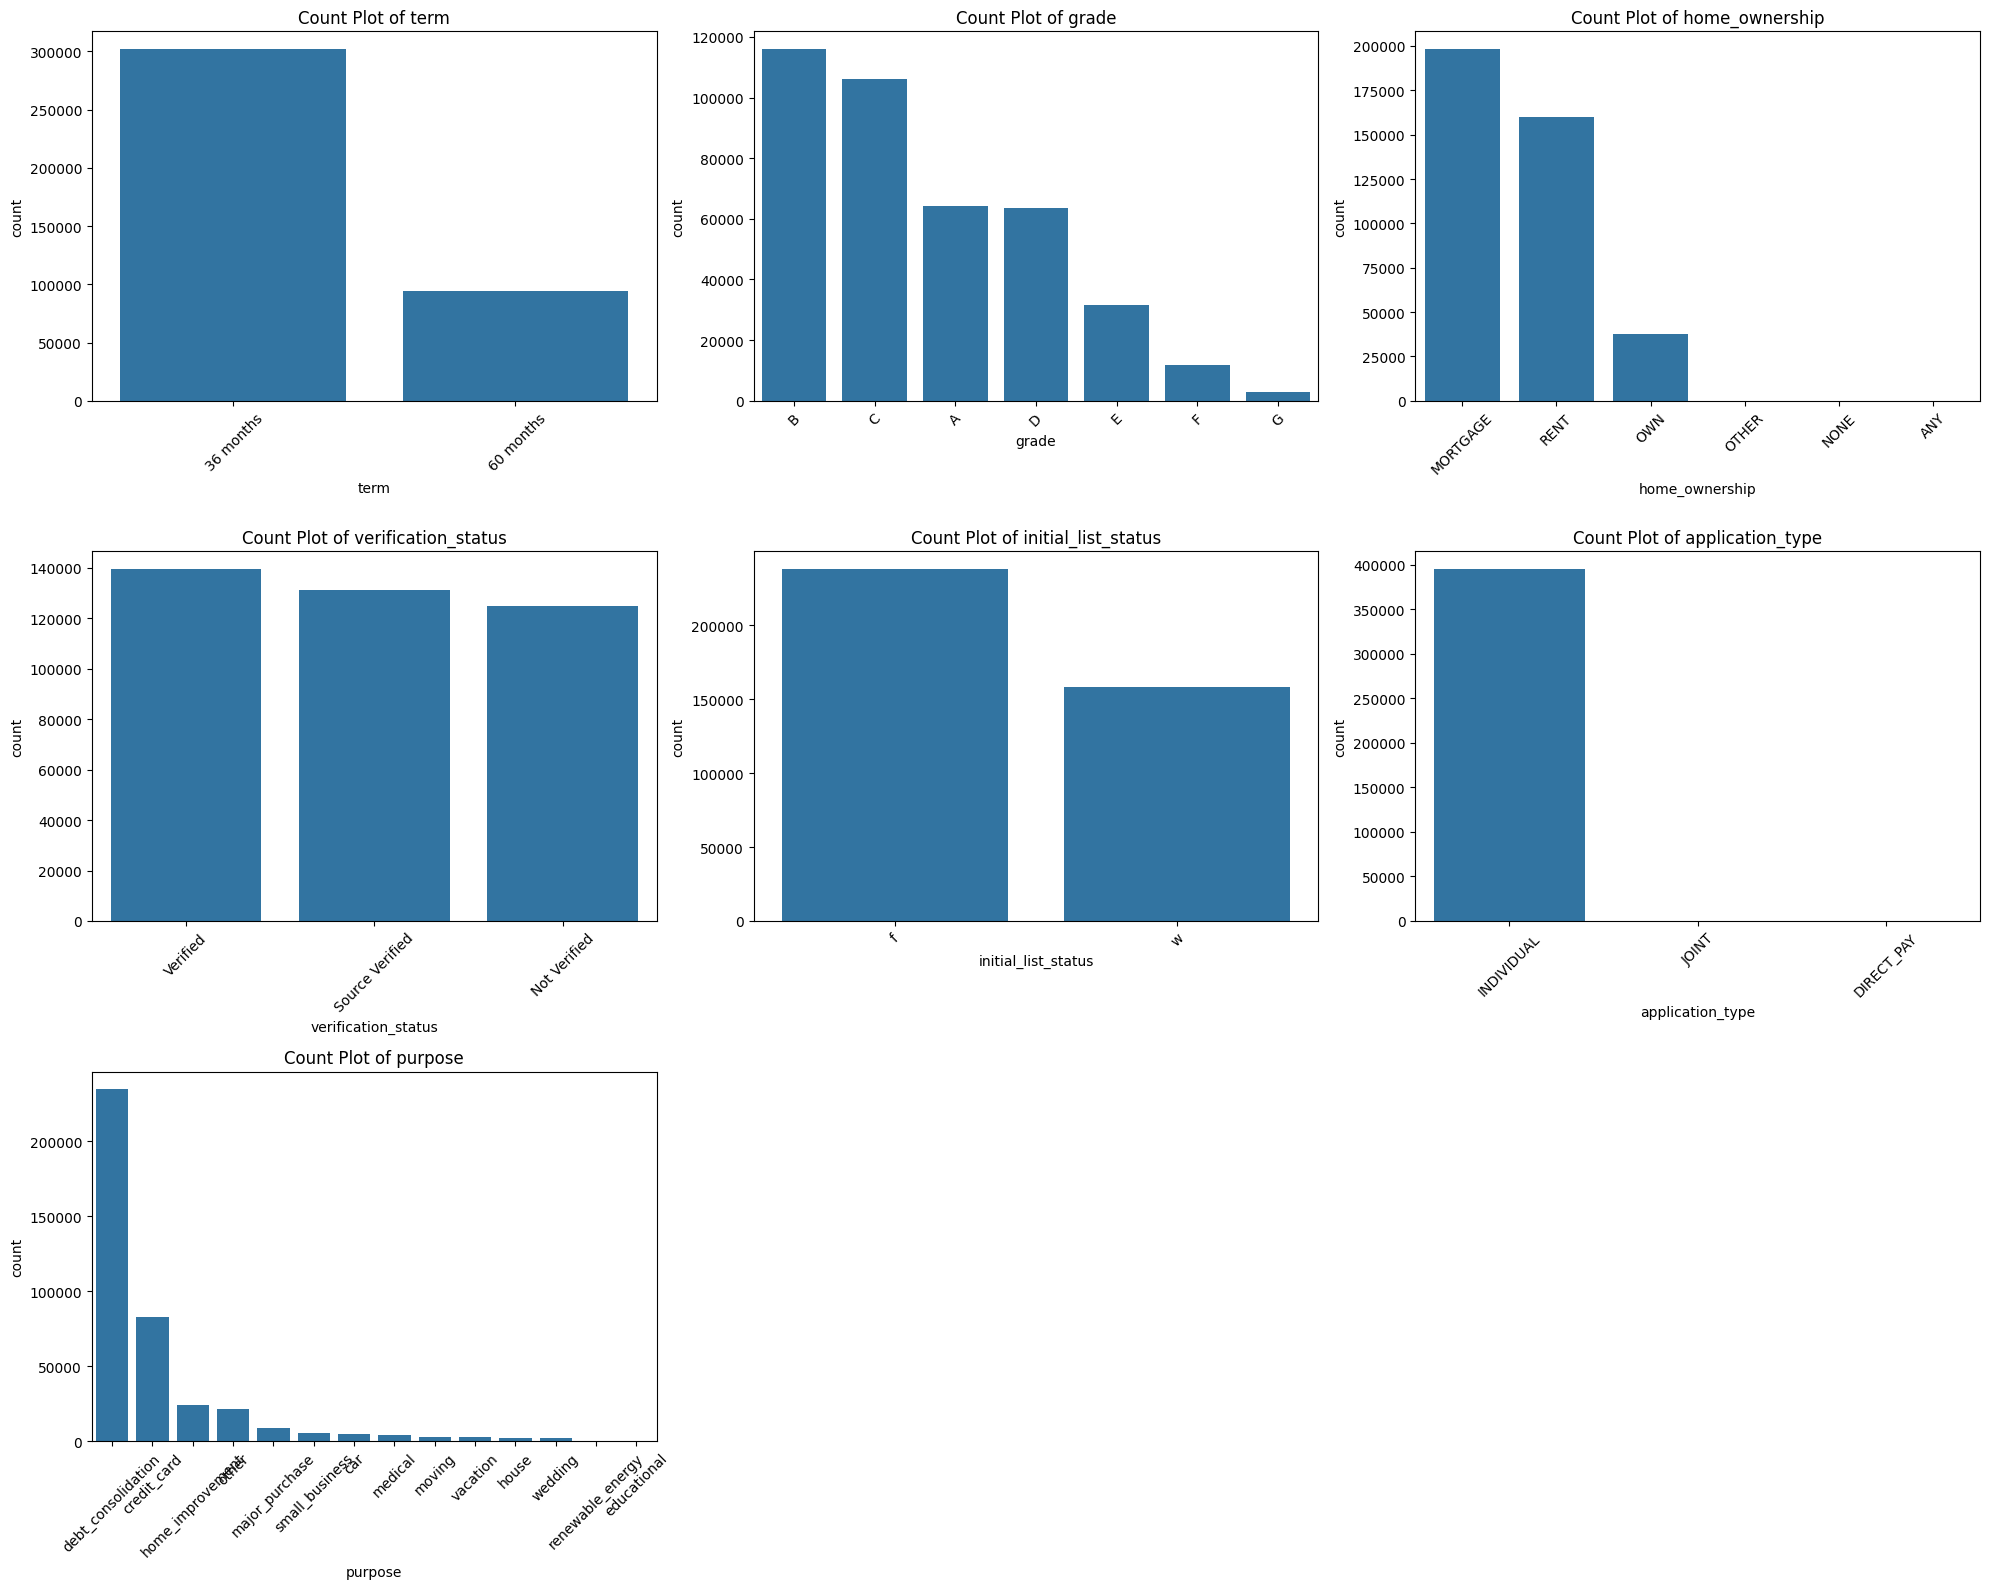

In [359]:
# List of original categorical columns (before encoding)
cat_cols = ['term', 'grade', 'home_ownership', 'verification_status',
            'initial_list_status', 'application_type','purpose']

# Set plot size
plt.figure(figsize=(20, 16))

# Loop and plot each variable
for i, col in enumerate(cat_cols, 1):
    plt.subplot((len(cat_cols) // 3) + 1, 3, i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()


### Summary of Variable Distributions

- **Term:** Most loans have a 36-month term, with fewer loans spanning 60 months, indicating a preference for shorter loan durations.
- **Grade:** Borrowers primarily fall into credit grades B and C, suggesting moderate to good credit quality.
- **Home Ownership:** The largest groups are mortgage holders and renters, with fewer applicants owning homes outright.
- **Verification Status:** Income verification is common, with ‘Verified’ and ‘Source Verified’ statuses dominating; ‘Not Verified’ applicants are fewer but present.
- **Initial Listing Status:** The listing status ‘f’ is significantly more frequent than ‘w’.
- **Application Type:** Nearly all loans are individual applications, with joint and direct pay applications being rare.
- **Purpose:** Debt consolidation is the most frequent loan purpose, followed by credit card repayment and home improvement, reflecting borrowers’ needs to manage existing debt.

These insights provide valuable context on borrower profiles and loan characteristics, informing feature selection and risk modeling.


# Data Preprocessing

## Missing Value

We identify and address missing data to improve model accuracy. Numerical missing values are imputed appropriately, while categorical missing values are handled by assigning separate categories or using mode imputation. Features with excessive missingness may be dropped to maintain data quality.

In [360]:
print(df.isnull().sum())

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64


- **`emp_title` (~5.8% missing):** This high-cardinality free-text job title field lacks standardization and offers limited predictive value. To reduce noise and complexity, we drop this column.
- **`emp_length` (~4.6% missing):** Employment length is an important creditworthiness indicator. Missing values are imputed using the median after cleaning.
- **`title` (~0.4% missing):** The loan title overlaps significantly with the loan purpose and has minimal missing data. We drop this column to avoid redundancy.
- **`revol_util` (~0.07% missing):** Few missing values, imputed with median to handle skewness in revolving credit utilization.
- **`mort_acc` (~9.6% missing):** Missing values are imputed using the median to preserve information on mortgage accounts.
- **`pub_rec_bankruptcies` (~0.13% missing):** A categorical count variable with minimal missingness, imputed using the mode (typically zero).


Handling missing values carefully helps keep important borrower information while simplifying the dataset. Dropping noisy features like `emp_title` and `title` reduces complexity, and imputing key fields ensures better credit risk prediction.

### Handling Missing Values Strategy

- The `emp_length` column is cleaned by converting text durations (e.g., "< 1 year" to 0, "10+ years" to 10) to numeric values. Missing values are imputed with the median.
- Missing values in `revol_util`, `mort_acc`, and `pub_rec_bankruptcies` are imputed using median or mode, ensuring robustness against outliers.
- For numerical features like `annual_inc` and `revol_bal`, missing values are imputed with the median to maintain data consistency.


In [361]:
def clean_emp_length(val):
    if pd.isnull(val):
        return np.nan
    elif val == '< 1 year':
        return 0
    elif val == '10+ years':
        return 10
    else:
        return int(val.strip().split()[0])

df['emp_length_cleaned'] = df['emp_length'].apply(clean_emp_length)

emp_median = df['emp_length_cleaned'].median()
df['emp_length_cleaned'].fillna(emp_median, inplace=True)

revol_util_median = df['revol_util'].median()
df['revol_util'].fillna(revol_util_median, inplace=True)

mort_acc_median = df['mort_acc'].median()
df['mort_acc'].fillna(mort_acc_median, inplace=True)

pub_rec_bankruptcies_mode = df['pub_rec_bankruptcies'].mode()[0]
df['pub_rec_bankruptcies'].fillna(pub_rec_bankruptcies_mode, inplace=True)



In [362]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

cols_to_impute = ['annual_inc', 'revol_bal']

df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

## Duplicate Value

In [363]:
print("Duplicate Rows: ", df.duplicated().sum())

Duplicate Rows:  0


uplicate records can bias analysis and model results. We examined the dataset for duplicates and found **no duplicate rows**, confirming that all loan application records are unique and reliable for modeling.

## Dropping unnecesary columns

In [364]:
cols_to_drop = [ 'title', 'address', 'issue_d', 'sub_grade', 'emp_length']
df.drop(columns=cols_to_drop, inplace=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_title',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies',
       'emp_length_cleaned'],
      dtype='object')

Based on prior analysis, the following columns are removed due to low predictive value, redundancy, or high cardinality:

- `title`: Overlaps with `purpose` and adds little new information.
- `address`: Found to be insignificant for predicting loan status.
- `issue_d`: Date field not used directly in modeling.
- `sub_grade`: Redundant with `grade`.
- `emp_length`: Replaced by a cleaned numerical version.

Removing these columns simplifies the dataset, reduces noise, and improves model efficiency.


## Feature Engineering

## Bucketing Job Titles

The `emp_title` feature contains many unique job titles with varying risk profiles. To handle this high cardinality and improve model stability, we group job titles into broader risk-based buckets. This approach balances reducing noise with preserving important predictive signals identified during exploratory analysis.

In [365]:
df['emp_title'] = df['emp_title'].fillna('Unknown')
df['emp_title_clean'] = df['emp_title'].str.lower().str.strip()

def risk_grouped_title(title):
    if 'driver' in title or 'owner' in title:
        return 'High Risk'
    elif 'teacher' in title or 'manager' in title or 'supervisor' in title:
        return 'Low Risk'
    elif 'technician' in title or 'sales' in title or 'clerk' in title:
        return 'Medium Risk'
    elif title == 'unknown':
        return 'Unknown'
    else:
        return 'Other'

df['emp_title_risk_group'] = df['emp_title_clean'].apply(risk_grouped_title)

risk_map = {'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2, 'Other': 3, 'Unknown': 4}
df['emp_title_risk_encoded'] = df['emp_title_risk_group'].map(risk_map)

freq_map = df['emp_title_risk_group'].value_counts(normalize=True)
df['emp_title_risk_freq'] = df['emp_title_risk_group'].map(freq_map)

#df[['emp_title', 'emp_title_risk_group', 'emp_title_risk_encoded', 'emp_title_risk_freq']].head()


We categorize the `emp_title` feature based on insights from our exploratory data analysis (EDA). To reduce cardinality and minimize noise in the model, job titles are grouped into five risk-based categories:

- **High Risk:** Titles containing “driver” or “owner,” linked to higher default rates  
- **Low Risk:** Titles containing “teacher,” “manager,” or “supervisor,” associated with better repayment outcomes  
- **Medium Risk:** Titles containing “technician,” “sales,” or “clerk”  
- **Unknown:** Missing or null job titles  
- **Other:** All remaining job titles not included above  

This grouping approach is guided by the significant association between `emp_title` and loan status found in the chi-square test. It effectively reduces dimensionality while preserving the feature’s predictive power in the model.

After bucketing, we drop the original `emp_title` and `emp_title_clean` columns from the dataframe. This removes redundant, high-cardinality features and helps simplify the dataset for modeling.

In [366]:
df.drop(columns=['emp_title', 'emp_title_clean'], inplace=True)

##Binary Flags

We create binary flag variables to indicate the presence or absence of important credit risk indicators:

- `pub_rec_flag`: Indicates if the borrower has any public derogatory records (`pub_rec`).
- `mort_acc_flag`: Indicates if the borrower has any mortgage accounts (`mort_acc`).
- `bankruptcy_flag`: Indicates if the borrower has any recorded bankruptcies (`pub_rec_bankruptcies`).

In [367]:
df['pub_rec_flag'] = df['pub_rec'].apply(lambda x: 1 if x > 0 else 0)
df['mort_acc_flag'] = df['mort_acc'].apply(lambda x: 1 if x > 0 else 0)
df['bankruptcy_flag'] = df['pub_rec_bankruptcies'].apply(lambda x: 1 if x > 0 else 0)

## Extracting Credit Age

The original `earliest_cr_line` feature is an **object (string) variable** representing the month and year when the borrower’s first credit line was opened (e.g., "Jan-2005"). To make it useful for modeling, we convert this string into a timestamp and then extract the borrower’s credit history length in years by calculating the difference between the current date and the earliest credit line date. This new numerical feature, `credit_age_years`, reflects the borrower’s credit experience, where a longer credit history typically indicates lower default risk.


In [368]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y', errors='coerce')
df['credit_age_years'] = (pd.to_datetime('today') - df['earliest_cr_line']).dt.days / 365
df.drop(columns=['earliest_cr_line'], inplace=True)
df['credit_age_years'] = df['credit_age_years'].fillna(df['credit_age_years'].median())

## Encoding categorical variables

- **Label Encoding:**  
  The ordinal feature `grade` is label encoded to convert credit grades (A to G) into numeric values reflecting increasing risk levels.  
  Similarly, the `emp_title_risk_group` buckets are label encoded to prepare for model input.

- **One-Hot Encoding:**  
  Nominal categorical variables with no inherent order — such as `home_ownership`, `verification_status`, `purpose`, `initial_list_status`, and `application_type` — are one-hot encoded. This creates binary columns for each category while avoiding multicollinearity by dropping the first category.

- **Term Conversion:**  
  The `term` feature, originally stored as strings (e.g., "36 months"), is converted to integer values (e.g., 36) to enable numerical processing.


In [369]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'grade'
le = LabelEncoder()
df['grade_encoded'] = le.fit_transform(df['grade'])

# Label encode 'emp_title_risk_group'
le_risk = LabelEncoder()
df['emp_title_risk_encoded'] = le_risk.fit_transform(df['emp_title_risk_group'])

# One-hot encode nominal categorical columns
nominal_cols = ['home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

df['term'] = df['term'].str.extract('(\d+)').astype(int)

grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
df['grade_encoded'] = df['grade'].map(grade_mapping)


# Post Cleaning EDA

fter data cleaning and preprocessing, we perform a fresh exploratory analysis to understand the refined dataset. This helps verify data quality, reassess feature distributions, and identify any new patterns or insights that may inform model development.

## Univariate Analysis -Continous
We examine the distribution and key statistics of continuous features to understand their central tendencies, spread, and presence of outliers. This analysis guides feature scaling, transformation, and potential feature engineering steps.

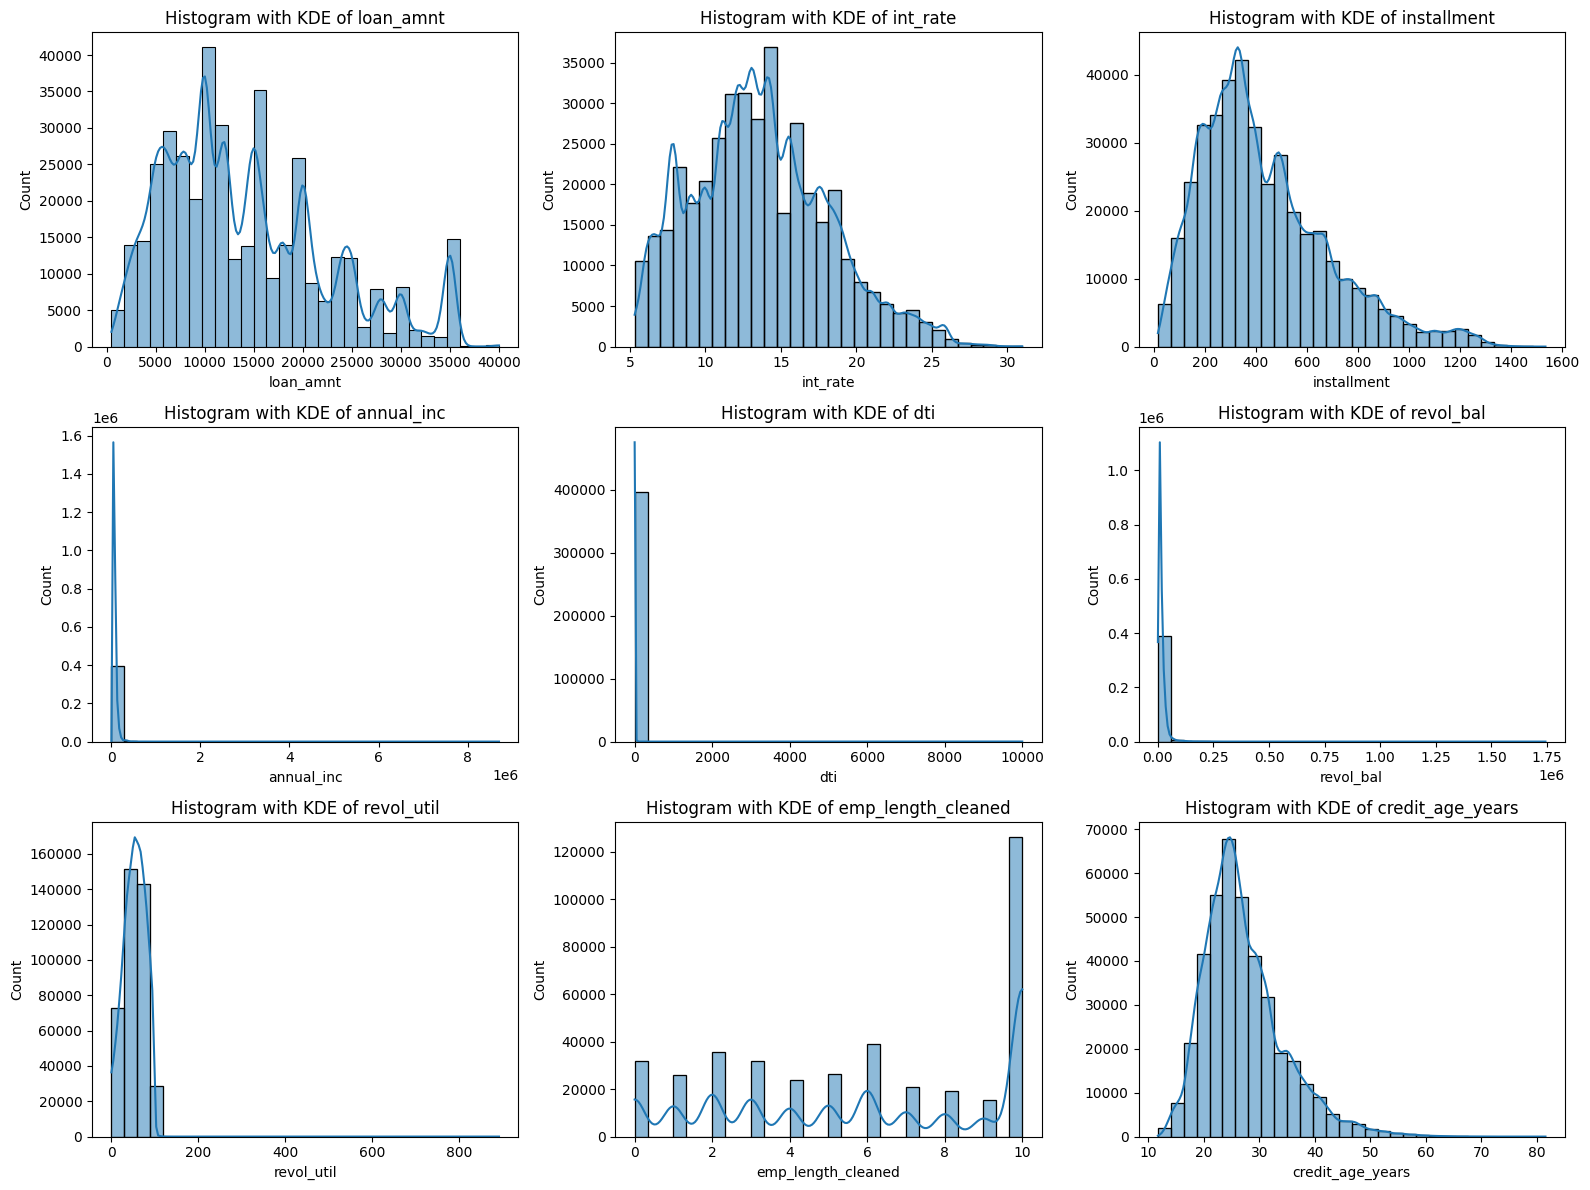

In [370]:
num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'emp_length_cleaned', 'credit_age_years']

plt.figure(figsize=(16, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram with KDE of {col}')
    plt.tight_layout()

plt.show()


The histograms reveal the following insights about borrower financial attributes:

- Most borrowers tend to take loans around common amounts, reflected by distinct peaks in loan amounts.
- Interest rates and monthly installments are right-skewed, with a majority of loans clustered at moderate rates and payments.
- Annual income and revolving balances show heavy right skewness, indicating many borrowers have moderate incomes and balances, while a small group has very high values.
- Debt-to-income ratios are concentrated at lower values, suggesting most borrowers maintain manageable debt levels.
- Revolving credit utilization is mostly low to moderate, highlighting cautious credit usage among borrowers.
- Employment length shows a bimodal pattern, with clusters of both new entrants and long-tenured workers.
-The credit_age_years distribution is right-skewed, with most borrowers having 10–15 years of credit history. Few have very long credit histories, indicating most borrowers are relatively new to credit.

These distributions highlight typical borrower profiles and the presence of outliers, which are critical to consider during modeling to ensure balanced risk assessment.


To further understand the distribution of continuous variables and identify potential outliers, we will create box plots for key financial features. Outliers can significantly impact model performance, so detecting and addressing them is important.

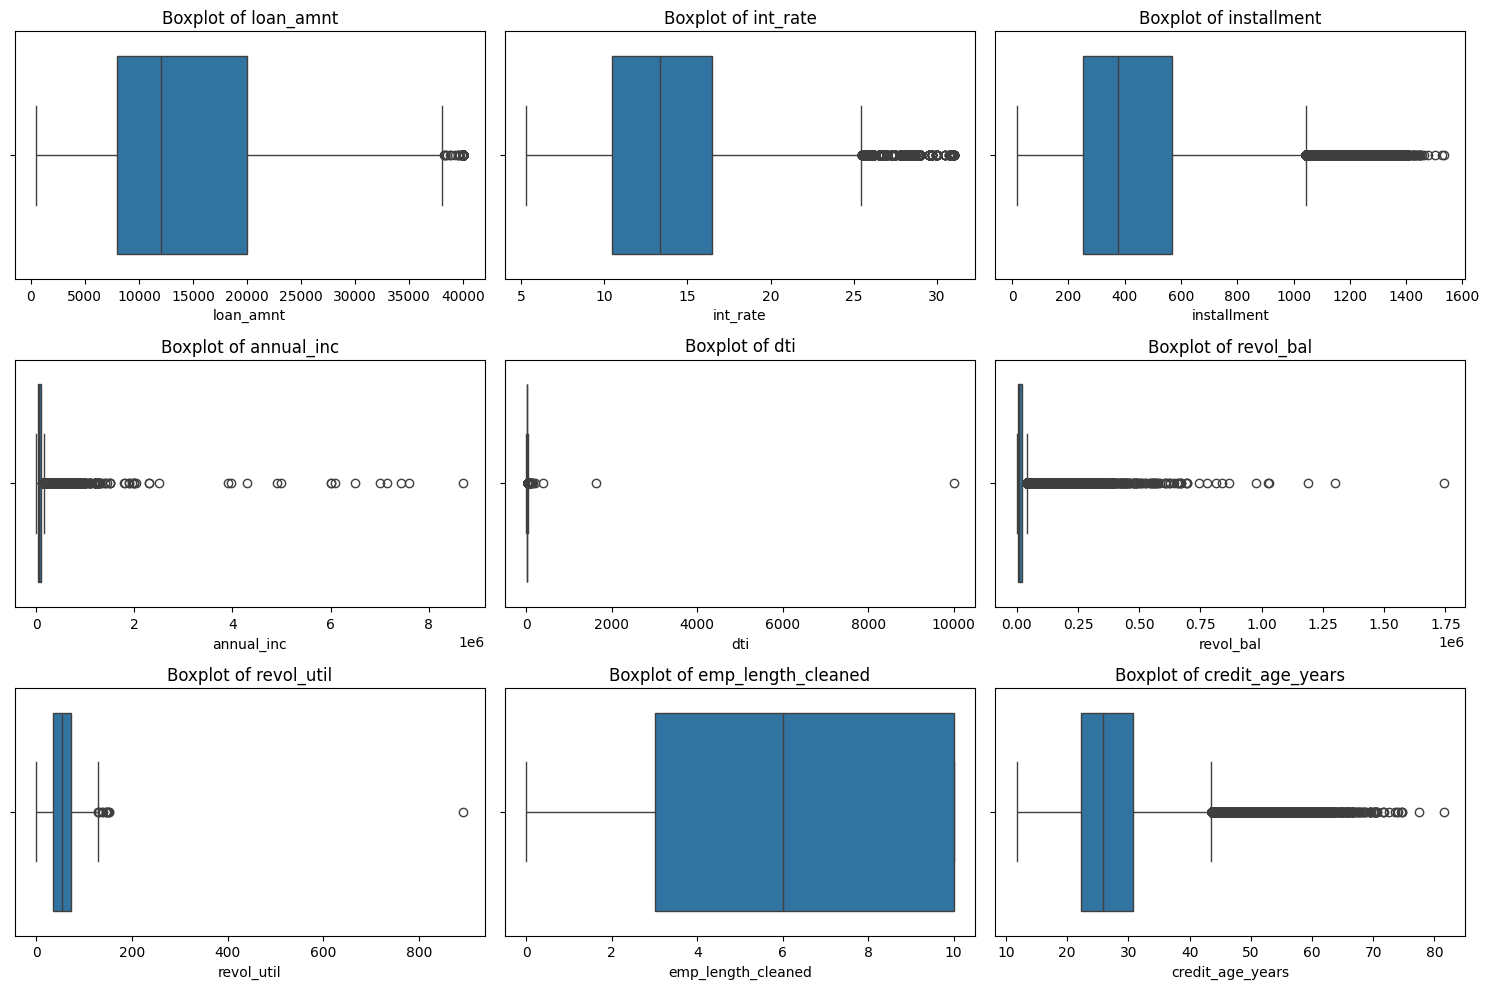

In [371]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


The distributions of key financial variables reveal substantial skewness and variability, highlighting the diverse financial situations of LoanTap’s borrowers.

- **Loan Amounts, Interest Rates, and Installments:** Most loans cluster in the mid-range with moderate repayment terms, reflecting typical borrower needs such as debt consolidation or credit card refinancing. However, the presence of outliers indicates a subset of borrowers seeking larger or higher-risk loans, which requires careful risk assessment.

- **Income and Revolving Balances:** The heavy skewness suggests a small segment of high-income borrowers and those with significant credit usage. This group may present distinct repayment behaviors, necessitating tailored underwriting rules.

- **Debt-to-Income Ratios and Credit Utilization:** While most borrowers maintain manageable debt levels, a minority show elevated risk factors. These metrics are critical for identifying applicants with higher default potential.

- **Employment Length:** The wide variation points to a borrower base that includes both early-career individuals and long-term employees, implying varied income stability profiles.

- **Credit Age:** The box plot shows a median credit age around 20–25 years, with 50% of borrowers having credit histories between approximately 15 and 35 years. Whiskers extend from near 0 up to about 50 years, and several outliers reach as high as 80 years, confirming the right-skewness observed in the histogram.

Given the skewness and variability observed in the histograms, we now examine box plots of key numerical features to identify and understand outliers.

Outliers can disproportionately influence model training and predictions. Detecting these extreme values will help us decide on appropriate handling strategies—whether to cap, transform, or exclude them—to improve model robustness and predictive accuracy.


## Bivariate Analysis

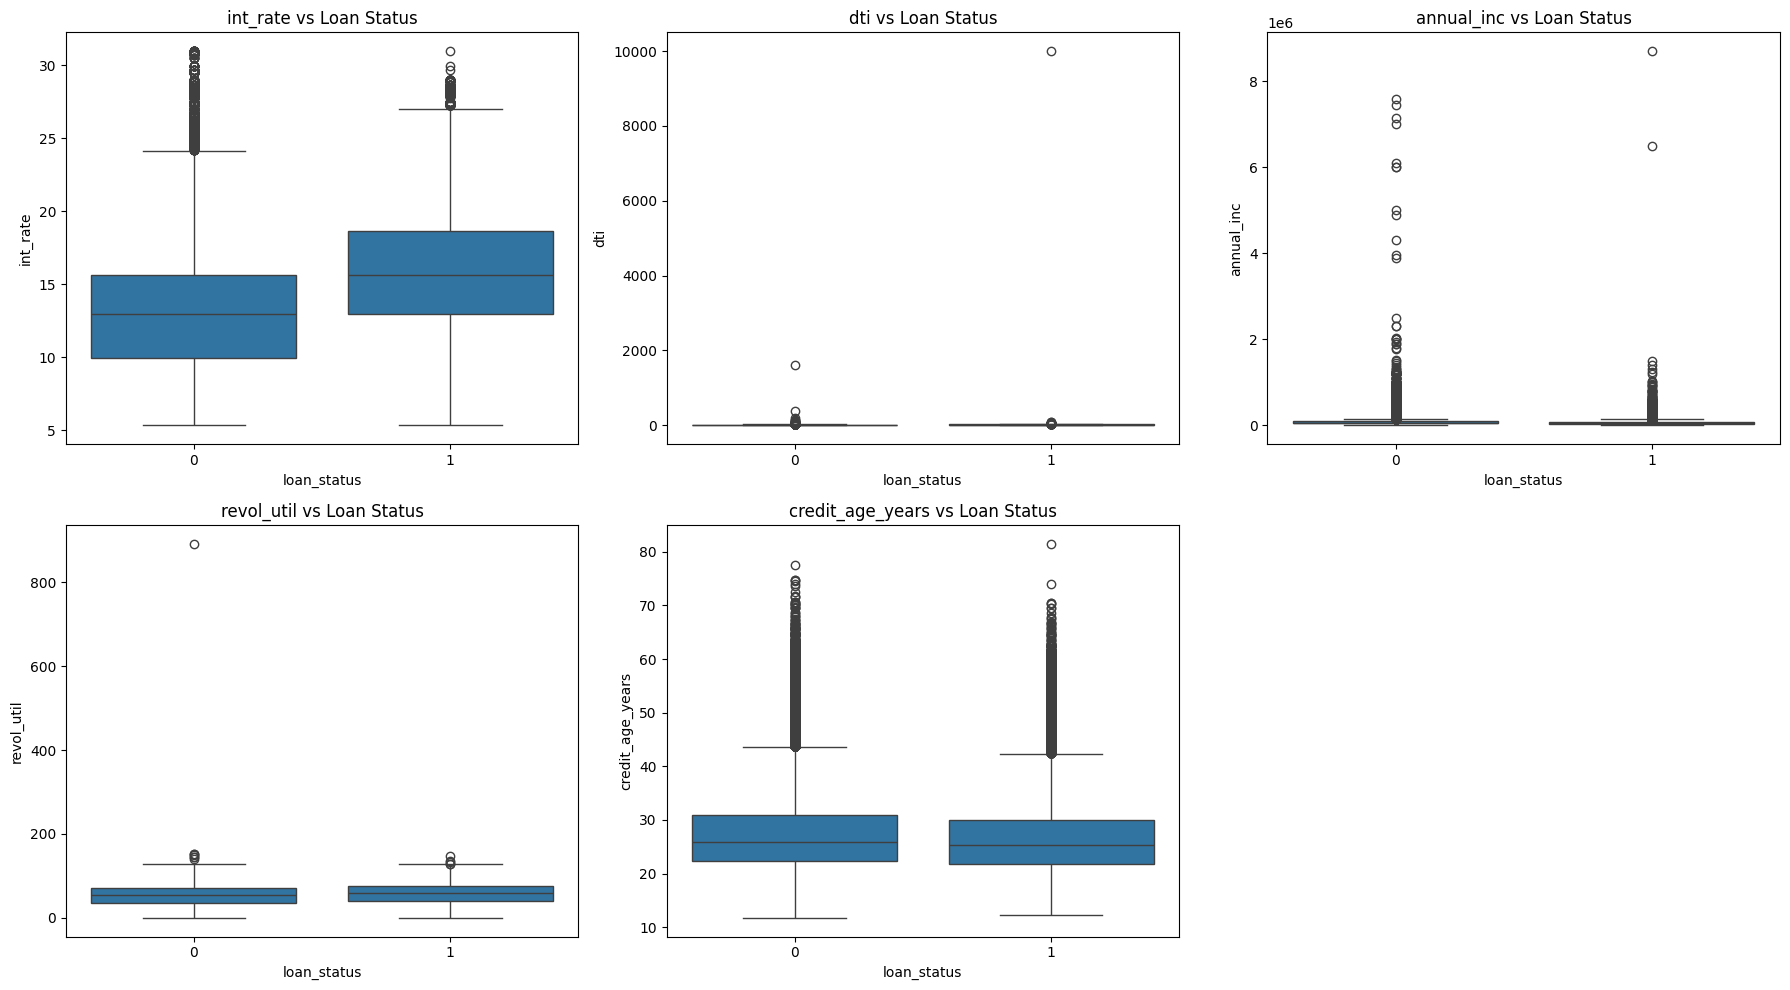

In [372]:
cont_vars = ['int_rate', 'dti', 'annual_inc', 'revol_util', 'credit_age_years']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns grid
axes = axes.flatten()  # Flatten to easily iterate

for i, var in enumerate(cont_vars):
    sns.boxplot(x='loan_status', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs Loan Status')

# Hide the last empty subplot (6th subplot)
if len(cont_vars) < len(axes):
    for j in range(len(cont_vars), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()



Among the five financial variables analyzed, **interest rate (`int_rate`) is the strongest predictor of loan status**, with higher rates clearly associated with increased default risk. There is also a slight indication that higher revolving credit utilization (`revol_util`) correlates with a greater chance of default, though the difference is less pronounced.

In contrast, **debt-to-income ratio (`dti`), annual income (`annual_inc`), and credit age (`credit_age_years`) show very similar distributions across good and bad loans**, suggesting they have minimal predictive power for distinguishing loan outcomes in this dataset.

Outliers are present in most variables, but their patterns are generally consistent across loan statuses and should be carefully considered during modeling to avoid skewed predictions.

Overall, lenders may benefit most from focusing on interest rates and, to a lesser extent, revolving utilization when assessing borrower risk. Other variables appear less informative for predicting defaults here.

### Outliers

In [373]:
continuous_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
                   'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                   'total_acc', 'mort_acc', 'pub_rec_bankruptcies','credit_age_years']

outlier_summary = []

for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    percent = len(outliers) / len(df) * 100
    outlier_summary.append((col, round(percent, 2)))

outlier_df = pd.DataFrame(outlier_summary, columns=['Variable', 'Outlier %'])
outlier_df.sort_values(by='Outlier %', ascending=False)


,Variable,Outlier %
6,pub_rec,14.58
11,pub_rec_bankruptcies,11.39
7,revol_bal,5.37
3,annual_inc,4.22
12,credit_age_years,3.09
2,installment,2.84
5,open_acc,2.60
9,total_acc,2.15
10,mort_acc,1.73
1,int_rate,0.95


#### Outlier Analysis

Outliers are present in several continuous variables, with the highest proportions in:

- `pub_rec`: 14.58% outliers  
- `pub_rec_bankruptcies`: 11.39% outliers  

Other variables like annual_inc (4.22%), revol_bal (5.37%), and credit_age_years (3.09%) show notable skewness and contain some extreme values. The presence of outliers in credit_age_years aligns with its right-skewed distribution, indicating a small subset of borrowers with exceptionally long credit histories.Variables such as `loan_amnt`, `dti`, and `revol_util` have less than 1% outliers and are mostly unaffected.

In [374]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

for col in ['pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'annual_inc']:
    df[col] = cap_outliers(df[col])


In [375]:
df['annual_inc'] = np.log1p(df['annual_inc'])
df['revol_bal'] = np.log1p(df['revol_bal'])
df['flag_pub_rec_high'] = (df['pub_rec'] > df['pub_rec'].quantile(0.95)).astype(int)

#### Outlier Treatment Strategy

To handle outliers and skewness, we apply the following preprocessing steps:

- **Outlier capping:** Variables with more than 5% outliers (`pub_rec`, `pub_rec_bankruptcies`, `revol_bal`, `annual_inc`) are capped using the IQR method to limit extreme values while preserving most data.  
- **Log transformation:** Skewed variables like `annual_inc` and `revol_bal` are log-transformed (`log1p`) to reduce skewness and normalize distributions.  
- **Standardization:** Variables with borderline outliers will be standardized to minimize outlier influence during modeling.  
- **Retention of minor outliers:** Variables with less than 1% outliers (e.g., `loan_amnt`, `dti`, `revol_util`) are retained as-is since outliers have minimal impact.

This approach ensures model stability and improved predictive performance by carefully managing extreme values.

### Grade Vs Loan Status

Loan Status Distribution by Grade (%)

loan_status          0          1
grade                            
A            93.712122   6.287878
B            87.426951  12.573049
C            78.819100  21.180900
D            71.132171  28.867829
E            62.636560  37.363440
F            57.212029  42.787971
G            52.161100  47.838900


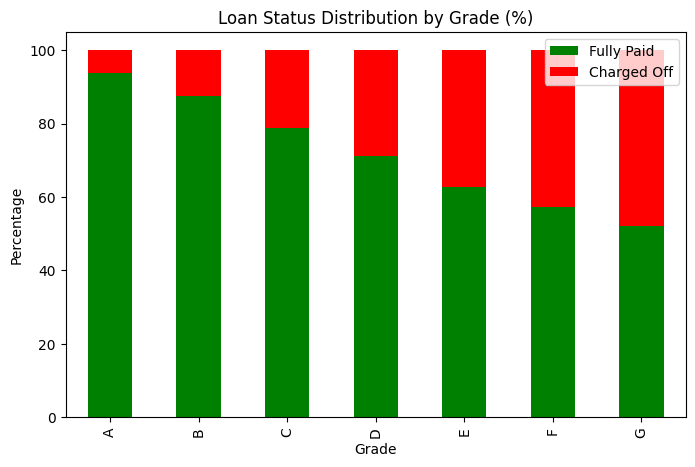

In [376]:
# Crosstab table: proportion of loan status by grade (in %)
grade_status_pct = pd.crosstab(df['grade'], df['loan_status'], normalize='index') * 100
print("Loan Status Distribution by Grade (%)\n")
print(grade_status_pct)

# Plot
grade_status_pct.plot(kind='bar', stacked=True, figsize=(8,5), color=['green', 'red'])
plt.title('Loan Status Distribution by Grade (%)')
plt.xlabel('Grade')
plt.ylabel('Percentage')
plt.legend(['Fully Paid', 'Charged Off'])
plt.show()


- Grade A loans have the highest repayment rate, with approximately **93.7% fully paid** and only **6.3% charged off**.  
- As the grade decreases from A to G, the proportion of charged-off loans steadily increases, indicating worsening credit risk:  
  - Grade B: 12.6% charged off  
  - Grade C: 21.2% charged off  
  - Grade D: 28.9% charged off  
  - Grade E: 37.4% charged off  
  - Grade F: 42.8% charged off  
  - Grade G: 47.8% charged off  

This pattern shows a clear, monotonic relationship between loan grade and default risk: **lower grades are strongly associated with higher default rates.**


Loan grade is a very strong predictor of loan performance, validating its effectiveness in capturing borrower creditworthiness. Lenders can use these grades to price loans appropriately and refine underwriting criteria to mitigate risk.

Based on the clear relationship between loan grade and default risk, LoanTap should:

- Incorporate loan grades explicitly into underwriting decisions by tightening approval criteria or requiring additional verification for lower-grade applicants (Grades D and below).  
- Adjust pricing strategies to reflect risk, charging higher interest rates or fees for higher-risk grades to compensate for expected defaults.  
- Focus marketing and retention efforts on higher-grade borrowers, who demonstrate better repayment behavior, to optimize portfolio quality.  
- Use grade insights to develop targeted borrower education or support programs for lower-grade segments, potentially reducing default rates through proactive engagement.

Implementing these strategies will help reduce Non-Performing Assets (NPAs), improve portfolio profitability, and strengthen overall risk management.

In [377]:
'''pairplot_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'emp_length_cleaned', 'credit_age_years', 'loan_status']

sns.pairplot(df[pairplot_cols], hue='loan_status', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Continuous Variables Colored by Loan Status", y=1.02)
plt.show()'''


'pairplot_cols = [\'loan_amnt\', \'int_rate\', \'installment\', \'annual_inc\', \'dti\', \'revol_bal\', \'revol_util\', \'emp_length_cleaned\', \'credit_age_years\', \'loan_status\']\n\nsns.pairplot(df[pairplot_cols], hue=\'loan_status\', diag_kind=\'kde\', plot_kws={\'alpha\': 0.5})\nplt.suptitle("Pairplot of Continuous Variables Colored by Loan Status", y=1.02)\nplt.show()'

## Multivariate Analysis

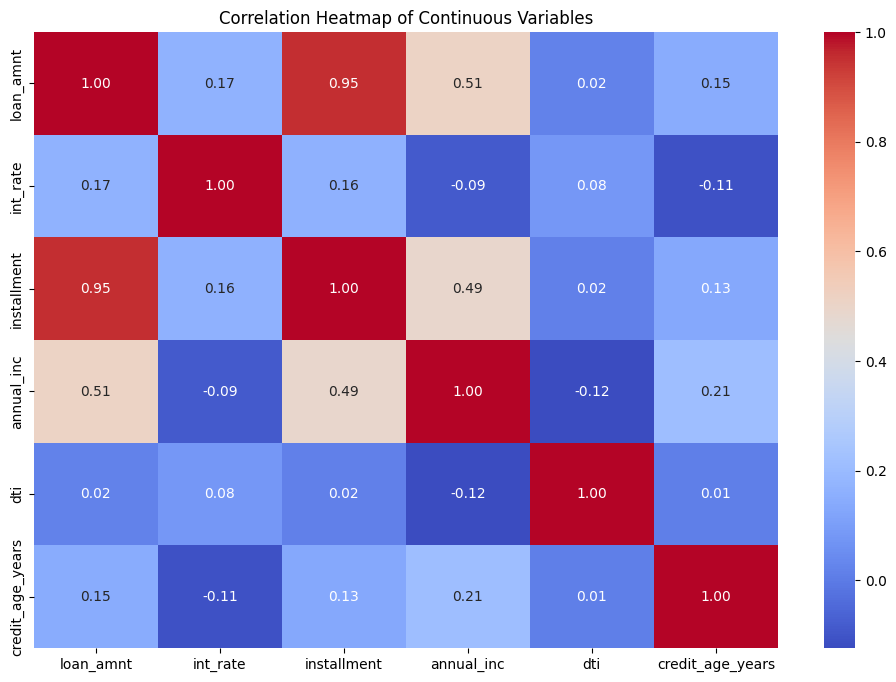

In [378]:
cont_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti','credit_age_years']

plt.figure(figsize=(12, 8))
corr_matrix = df[cont_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

**Key Observations:**  
- `loan_status` has the strongest correlation with **interest rate (`int_rate`)** (~0.25), indicating higher rates relate to greater default risk.  
- Other variables (`dti`, `annual_inc`, `revol_util`, `installment`, `loan_amnt`) show very weak correlations with `loan_status`.  
- `credit_age_years` shows only weak correlations with other continuous variables, the strongest being with `annual_inc` (0.21) and a weak negative correlation with `int_rate` (-0.11).  
- Strong correlations exist among features themselves, e.g.,  
  - `loan_amnt` and `installment` (very strong positive ~0.95)  
  - `loan_amnt` and `annual_inc` (moderate positive ~0.5)

**Business Insight:**  
Interest rate is a key numerical predictor of default risk. Other variables, while weakly correlated with default individually, are important for assessing borrower affordability and loan structure. Strong feature correlations reflect expected financial relationships important for model reliability.


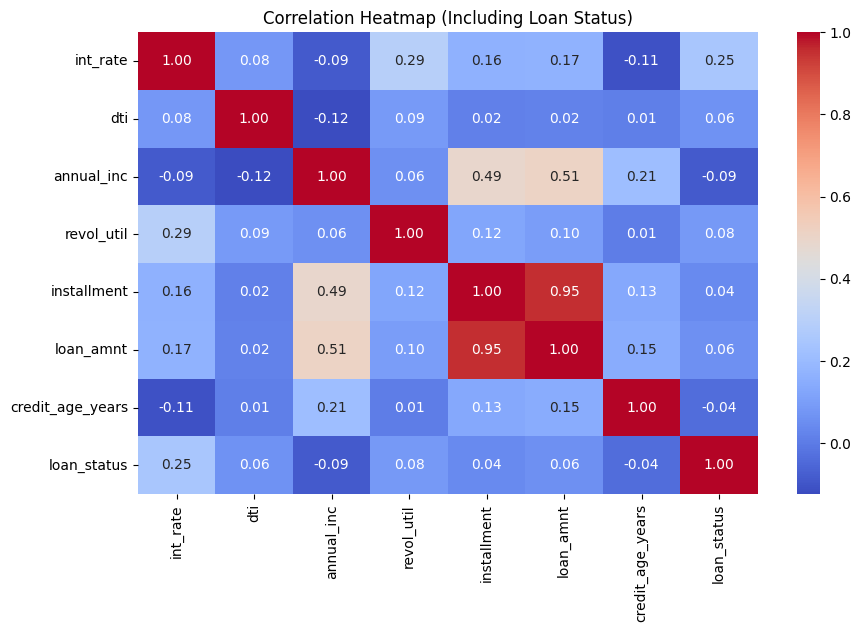

In [379]:
cont_corr_vars = ['int_rate', 'dti', 'annual_inc', 'revol_util', 'installment', 'loan_amnt','credit_age_years']
plt.figure(figsize=(10, 6))
sns.heatmap(df[cont_corr_vars + ['loan_status']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Including Loan Status)")
plt.show()

**Key Observations:**  
- Very strong positive correlation between `loan_amnt` and `installment`, confirming larger loans require higher monthly payments.  
- Moderate positive correlation between `annual_inc` and both `loan_amnt` and `installment`, reflecting higher income borrowers take larger loans and pay more monthly.  
- Other feature pairs exhibit weak or negligible correlations, indicating relative independence.  
- `credit_age_years` shows an extremely weak negative correlation with `loan_status` (-0.04), indicating virtually no linear relationship with loan default risk.  

**Business Insight:**  
These correlations validate lending logic and help avoid multicollinearity. Independence of some variables suggests the model benefits from multiple diverse predictors representing different aspects of borrower profile and loan terms.


- `int_rate` stands out as the strongest continuous predictor of loan default.  
- Other continuous variables contribute mostly to understanding borrower capacity and loan terms rather than directly predicting default.  
- Strong internal correlations among financial features confirm data quality and business logic.  
- These insights help prioritize features and guide feature engineering for improved credit risk modeling.


## Multicolinearity

I’m checking multicollinearity using the Variance Inflation Factor (VIF) to identify and address highly correlated features that could affect model stability and interpretation.

In [380]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def calc_iv(df, feature, target, bins=10):
    df_temp = df[[feature, target]].copy()
    df_temp['bin'] = pd.qcut(df_temp[feature], q=bins, duplicates='drop')
    grouped = df_temp.groupby('bin')[target].agg(['count', 'sum'])
    grouped['non_events'] = grouped['count'] - grouped['sum']

    grouped['event_rate'] = grouped['sum'] / grouped['sum'].sum()
    grouped['non_event_rate'] = grouped['non_events'] / grouped['non_events'].sum()

    grouped = grouped[(grouped['event_rate'] > 0) & (grouped['non_event_rate'] > 0)]
    grouped['woe'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])
    grouped['iv'] = (grouped['event_rate'] - grouped['non_event_rate']) * grouped['woe']

    iv = grouped['iv'].sum()
    return iv

# List of continuous variables
cont_vars = continuous_cols

iv_list = []

for var in cont_vars:
    iv_value = calc_iv(df, var, 'loan_status', bins=10)
    iv_list.append({'Variable': var, 'IV': round(iv_value, 4)})

iv_df = pd.DataFrame(iv_list).sort_values(by='IV', ascending=False).reset_index(drop=True)
print(iv_df)


                Variable      IV
0               int_rate  0.4147
1                    dti  0.1061
2             annual_inc  0.0475
3             revol_util  0.0455
4              loan_amnt  0.0282
5               mort_acc  0.0222
6            installment  0.0216
7       credit_age_years  0.0146
8               open_acc  0.0050
9              total_acc  0.0028
10             revol_bal  0.0015
11               pub_rec  0.0000
12  pub_rec_bankruptcies  0.0000


Information Value (IV) is a metric used to evaluate the predictive strength of independent variables in relation to a binary target variable (e.g., `loan_status`: fully paid vs charged off).

- **IV > 0.3**: Strong predictive power  
- **0.1 < IV ≤ 0.3**: Moderate predictive power  
- **0.02 < IV ≤ 0.1**: Weak predictive power  
- **IV ≤ 0.02**: Very weak or no predictive power

We calculated IV scores by binning continuous features into deciles and computing Weight of Evidence (WoE) for each bin.

---

### Interpretation of IV Scores

| Variable               | IV      | Interpretation                                |
|------------------------|---------|-----------------------------------------------|
| **int_rate**           | 0.4147  | **Strong predictor** — strongly associated with default risk. |
| **dti**                | 0.1061  | **Moderate predictor** — debt burden moderately influences default. |
| annual_inc             | 0.0475  | **Weak predictor** — some marginal signal from income. |
| revol_util             | 0.0455  | **Weak predictor** — modest insight into revolving credit usage. |
| loan_amnt              | 0.0282  | **Weak predictor** — limited standalone predictive value. |
| mort_acc               | 0.0222  | **Weak predictor** — minor impact, possibly linked to home ownership. |
| installment            | 0.0216  | **Weak predictor** — potentially redundant with `loan_amnt`. |
| **credit_age_years**   | 0.0146  | **Very weak predictor** — minimal value in distinguishing good vs bad loans. |
| **open_acc**           | 0.0050  | **Very weak predictor**. |
| **total_acc**          | 0.0028  | **Very weak predictor**. |
| **revol_bal**          | 0.0015  | **Negligible predictive value**. |
| **pub_rec**            | 0.0000  | **No predictive value**. |
| **pub_rec_bankruptcies** | 0.0000  | **No predictive value**. |

---

### Feature Selection Decision

- **Retained for Modeling:**  
  `int_rate` and `dti` are retained due to their strong and moderate predictive power, respectively.  
  Features like `annual_inc`, `revol_util`, and `loan_amnt` may still be helpful when used in interaction terms or after suitable transformations.

- **Dropped Due to Negligible Predictive Value:**  
  The following variables will be excluded from modeling due to their extremely low IV values:  
  `'credit_age_years'`, `'open_acc'`, `'total_acc'`, `'revol_bal'`, `'pub_rec'`, `'pub_rec_bankruptcies'`

> Although `credit_age_years` and `open_acc` have domain relevance, their IV scores confirm limited predictive power in this dataset and justify exclusion unless interaction or non-linear effects suggest otherwise.


In [381]:
# List of variables to drop based on low IV
vars_to_drop = ['credit_age_years', 'open_acc', 'total_acc', 'revol_bal', 'pub_rec', 'pub_rec_bankruptcies']

# Dropping these columns from the dataframe
df.drop(columns=vars_to_drop, inplace=True)


# Model Building

## Test Train split

The dataset is prepared for modeling by encoding categorical variables using one-hot encoding and splitting it into training and test sets (80/20 split). Numerical features are identified for potential scaling, and the binary target variable loan_status_binary is used for classification.

In [382]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Binary target
df['loan_status_binary'] = df['loan_status']

# Select numeric columns for scaling
num_cols_to_scale = ['int_rate', 'dti', 'annual_inc', 'revol_util', 'loan_amnt', 'installment']

# Drop target columns for features
X = df.drop(columns=['loan_status', 'loan_status_binary'])
y = df['loan_status_binary']

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

## Standardization

* StandardScaler is applied only on numerical columns present in the training dataset to normalize their distributions.

* The scaler is fit on the training data to learn mean and variance, then applied to both training and test sets to ensure consistent scaling.

* This prevents data leakage from the test set and improves model convergence and performance.

In [383]:

num_cols_present = [col for col in num_cols if col in X_train.columns]

scaler = StandardScaler()
X_train[num_cols_present] = scaler.fit_transform(X_train[num_cols_present])
X_test[num_cols_present] = scaler.transform(X_test[num_cols_present])

## Multiple Model Creation to Handle Class Imbalance

Since the dataset is imbalanced, we explore two commonly used techniques to address class imbalance:

- **SMOTE (Synthetic Minority Oversampling Technique):** Generates synthetic examples of the minority class.
- **class_weight='balanced':** Adjusts weights inversely proportional to class frequencies.

We build and compare four logistic regression models using different combinations of these techniques:

In [384]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Model 1: No SMOTE, No class_weight
model1 = LogisticRegression(max_iter=1000, random_state=42)
model1.fit(X_train, y_train)

# Model 2: SMOTE only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
model2 = LogisticRegression(max_iter=1000, random_state=42)
model2.fit(X_train_res, y_train_res)

# Model 3: class_weight='balanced', no SMOTE
model3 = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model3.fit(X_train, y_train)

# Model 4: SMOTE + class_weight='balanced'
model4 = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model4.fit(X_train_res, y_train_res)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Model Selection



## Metrics Analysis

In [385]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

models = [model1, model2, model3, model4]
names = ["No SMOTE / No Balance", "SMOTE Only", "Class Weight Only", "SMOTE + Class Weight"]

for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"\n\nModel {i+1}: {names[i]}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))




Model 1: No SMOTE / No Balance
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     63671
           1       0.55      0.07      0.12     15535

    accuracy                           0.81     79206
   macro avg       0.68      0.53      0.51     79206
weighted avg       0.76      0.81      0.74     79206

Confusion Matrix:
[[62834   837]
 [14492  1043]]
ROC AUC Score: 0.7117847244158961


Model 2: SMOTE Only
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79     63671
           1       0.33      0.54      0.41     15535

    accuracy                           0.69     79206
   macro avg       0.60      0.64      0.60     79206
weighted avg       0.76      0.69      0.72     79206

Confusion Matrix:
[[46523 17148]
 [ 7149  8386]]
ROC AUC Score: 0.6916740732251416


Model 3: Class Weight Only
Classification Report:
              precision    

## ROC Curve
Creating ROC Curve for Vizualization of AUC Score of the models

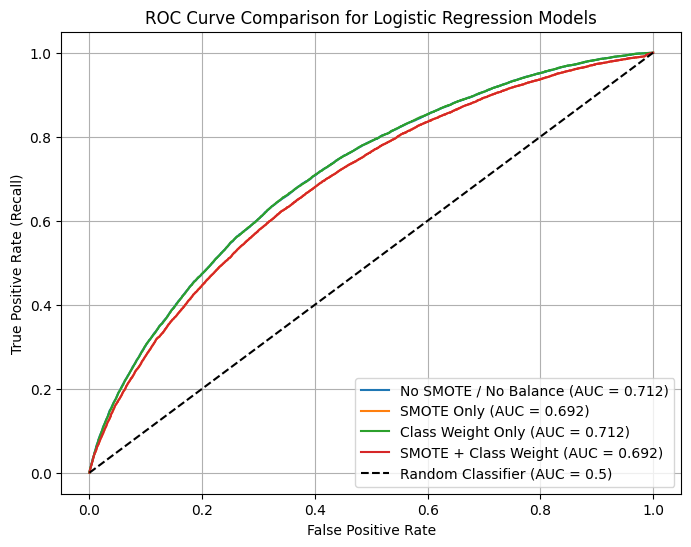

In [386]:
plt.figure(figsize=(8, 6))

for i, model in enumerate(models):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{names[i]} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison for Logistic Regression Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Model Evaluation

We evaluated **four logistic regression models** addressing class imbalance differently to predict loan default (`loan_status_binary`). Below is a summary of key metrics and interpretation based on the latest results.

---

### Model Performance Summary

| Model   | SMOTE Applied | Class Weight | Accuracy | Precision (Default) | Recall (Default) | F1-Score (Default) | ROC AUC |
|---------|---------------|--------------|----------|---------------------|------------------|--------------------|---------|
| Model 1 | ❌ No         | ❌ No        | 0.81     | 0.55                | 0.07             | 0.12               | 0.71    |
| Model 2 | ✅ Yes        | ❌ No        | 0.69     | 0.33                | 0.54             | 0.41               | 0.69    |
| Model 3 | ❌ No         | ✅ Yes       | 0.65     | 0.31                | 0.66             | 0.43               | 0.71    |
| Model 4 | ✅ Yes        | ✅ Yes       | 0.69     | 0.33                | 0.54             | 0.41               | 0.69    |

---

### Interpretation of Results

- **Model 1 (No SMOTE / No Class Weight):**  
  Highest accuracy (81%) mainly due to majority class dominance. Very low recall (7%) means most defaulters are missed despite a good ROC AUC (~0.71). Not suitable for risk detection.

- **Model 2 (SMOTE Only):**  
  Recall improves substantially to 54%, but precision drops to 33%, indicating more false positives. Accuracy decreases to 69%, and ROC AUC slightly drops to 0.69. Better at capturing defaulters but less precise.

- **Model 3 (Class Weight Only):**  
  Achieves best balance with highest recall (66%) and reasonable precision (31%), leading to the highest F1-score (0.43). Accuracy is lower at 65%, but ROC AUC remains high (~0.71). Effective for identifying defaulters without synthetic oversampling.

- **Model 4 (SMOTE + Class Weight):**  
  Mirrors Model 2 performance, showing no benefit from combining techniques. Risk of overfitting and no improvement in key metrics.

---

### Conclusion: Why Choose **Model 3**?

- Best trade-off between detecting defaulters (high recall) and managing false alarms (precision).
- Avoids synthetic data generation, preferable in regulated or sensitive environments.
- Maintains strong ROC AUC, showing robust discrimination capability.
- Most suitable for practical credit risk management applications.

---

### Visualization: ROC Curves

ROC curves (not shown) confirm Model 3 and Model 1 have highest AUC (~0.71), but Model 3’s improved recall makes it more effective for default prediction despite lower overall accuracy.


### Business Rationale for Selecting Model

In loan default prediction, the priority is not just accuracy but effectively **identifying likely defaulters** to minimize losses and maintain portfolio health.

---

### Why Model 3?

- Provides the **highest recall (66%)** without synthetic data or complexity.
- Avoids risks of **data leakage** or **overfitting** associated with oversampling (Models 2 & 4).
- Maintains a strong ROC AUC (0.71), showing good separation between classes.
- Balances catching risky borrowers with acceptable false positives (precision = 31%) for targeted interventions.

---

### Why Recall Matters in Credit Risk

> **Recall measures how many actual defaulters are correctly identified.**

- **False negatives (missed defaulters) are costlier** than false positives because each missed defaulter may result in financial loss and regulatory issues.
- Higher recall allows:
  - Stricter underwriting and risk-based pricing.
  - Proactive borrower engagement and portfolio management.

A few false alarms (false positives) are preferable over missing risky borrowers.

---

### Summary

Model 3 best meets business needs for early risk detection with simplicity and robustness, making it the optimal choice for credit risk modeling and deployment.


## Hyper Parameter tuning

In [387]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {
    'C': loguniform(0.01, 10),
    'penalty': ['l2'],           # restrict to L2 only to avoid solver issues
    'solver': ['liblinear'],     # liblinear is usually faster for small datasets
    'max_iter': [300]            # smaller max_iter to speed convergence
}

random_search = RandomizedSearchCV(
    estimator=LogisticRegression(class_weight='balanced', random_state=42),
    param_distributions=param_dist,
    n_iter=10,                  # fewer iterations sampled
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)
print("Best CV ROC AUC:", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'C': np.float64(0.6358358856676253), 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV ROC AUC: 0.7125916251949665


### Interpretation

Performed randomized search with 10 iterations and 3-fold CV (30 fits total) optimizing ROC AUC.

**Best parameters:**  
- C = 0.636  
- Penalty = L2  
- Solver = liblinear  
- Max iterations = 300  

**Best CV ROC AUC:** 0.713

This model balances bias-variance well and achieves strong default classification performance.

Note: L2 regularization was chosen over L1 to ensure coefficient stability and avoid solver compatibility issues.

## Threshold optimization

### PR Curve

Intersection Threshold: 0.6343
Precision at Intersection: 0.3909
Recall at Intersection: 0.3909


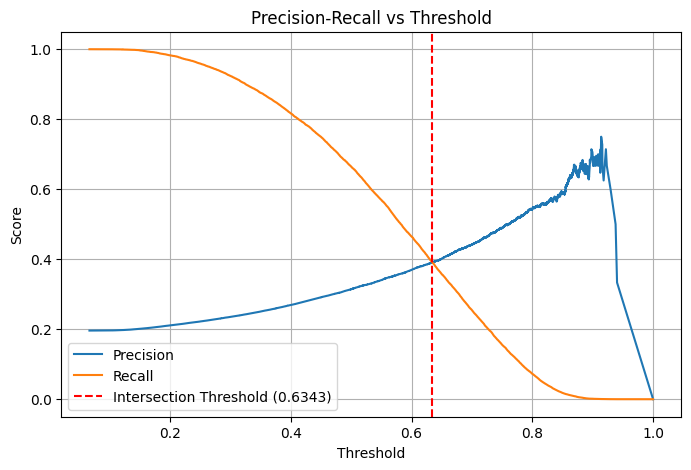

In [388]:
from sklearn.metrics import precision_recall_curve

y_probs = best_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

diff = np.abs(precision[:-1] - recall[:-1])
idx = np.argmin(diff)

threshold_at_intersection = thresholds[idx]
precision_at_intersection = precision[idx]
recall_at_intersection = recall[idx]

print(f"Intersection Threshold: {threshold_at_intersection:.4f}")
print(f"Precision at Intersection: {precision_at_intersection:.4f}")
print(f"Recall at Intersection: {recall_at_intersection:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.axvline(x=threshold_at_intersection, color='red', linestyle='--', label=f'Intersection Threshold ({threshold_at_intersection:.4f})')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


### Analysis

The plot illustrates how **precision** and **recall** vary as the classification threshold changes. At the **intersection threshold of 0.6342**, both precision and recall are approximately equal at **39%**, indicating a balanced trade-off point.

This threshold is valuable because it equally weighs:

- **Recall**: The ability to correctly identify actual loan defaults (true positives), important for minimizing financial losses.
- **Precision**: The accuracy of predicted defaults, helping reduce unnecessary interventions on non-risky borrowers.

Choosing this threshold helps balance risk detection with operational efficiency, making it a practical point for real-world decision-making.


# Result Evaluation

## Final Model

Using the optimized threshold of 0.6346—determined from the precision-recall curve intersection—we build the final logistic regression model. The following metrics are calculated on both training and test sets to evaluate its predictive performance and reliability in identifying loan defaults.


In [394]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Threshold from Precision-Recall intersection
threshold = 0.6346

# Features and coefficients
feature_names = X_train.columns
coefficients = best_model.coef_[0]
intercept = best_model.intercept_[0]

# Print coefficients table
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(f"Intercept (bias): {intercept:.4f}\n")
print("Coefficients:")
print(coef_df.to_string(index=False))

# Logistic regression equation as string
equation_terms = [f"({coef:.4f} * {feat})" for coef, feat in zip(coefficients, feature_names)]
equation = " + ".join(equation_terms)
print("\nFinal Logistic Regression Equation:")
print(f"logit(p) = {intercept:.4f} + {equation}")
print("Where p = probability of loan default\n")

# Helper function to predict class using threshold
def predict_with_threshold(probs, thresh):
    return (probs >= thresh).astype(int)

# Predict probabilities on train and test sets
y_train_prob = best_model.predict_proba(X_train)[:, 1]
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# Predict classes using threshold
y_train_pred = predict_with_threshold(y_train_prob, threshold)
y_test_pred = predict_with_threshold(y_test_prob, threshold)

# Extended metrics calculation function
def calc_metrics_extended(y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)  # Sensitivity / True Positive Rate
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    specificity = TN / (TN + FP)
    false_positive_rate = FP / (FP + TN)
    false_negative_rate = FN / (FN + TP)
    return {
        'accuracy': acc,
        'precision': prec,
        'recall (sensitivity)': rec,
        'specificity': specificity,
        'f1_score': f1,
        'roc_auc': auc,
        'true_positive_rate': rec,
        'false_positive_rate': false_positive_rate,
        'true_negative_rate': specificity,
        'false_negative_rate': false_negative_rate,
        'confusion_matrix': cm
    }

# Train metrics
train_metrics = calc_metrics_extended(y_train, y_train_pred, y_train_prob)
print("Train Metrics:")
for metric, value in train_metrics.items():
    if metric == 'confusion_matrix':
        print(f"{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")

# Test metrics
test_metrics = calc_metrics_extended(y_test, y_test_pred, y_test_prob)
print("\nTest Metrics:")
for metric, value in test_metrics.items():
    if metric == 'confusion_matrix':
        print(f"{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")


Intercept (bias): -1.5263

Coefficients:
                            Feature  Coefficient
             purpose_small_business     0.572017
                                dti     0.465886
           purpose_renewable_energy     0.368095
        application_type_INDIVIDUAL     0.328229
                            grade_C     0.313621
                      grade_encoded     0.301080
                purpose_educational     0.273388
       emp_title_risk_group_Unknown     0.268354
                    purpose_medical     0.260282
                            grade_D     0.258815
                       pub_rec_flag     0.252162
                     purpose_moving     0.247148
                        installment     0.234189
                            grade_B     0.199450
           purpose_home_improvement     0.180540
                      purpose_other     0.152392
verification_status_Source Verified     0.137970
                   purpose_vacation     0.137312
                            

## Confusion Matix Plot

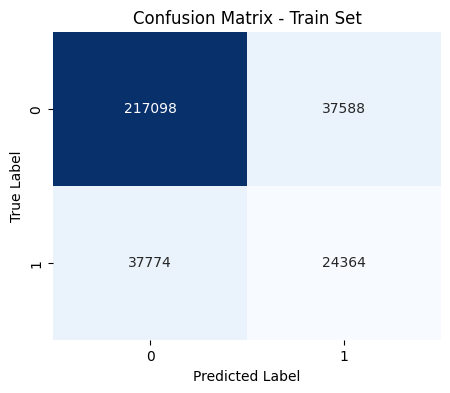

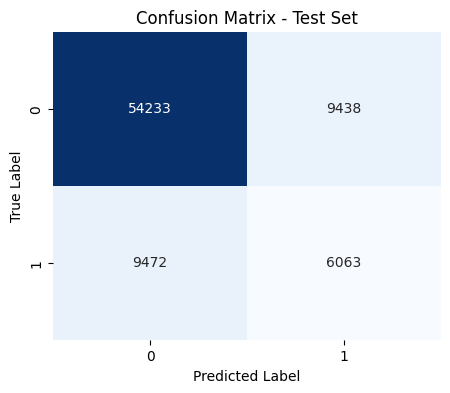

In [395]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plot confusion matrix for training data
plot_confusion_matrix(train_cm, 'Confusion Matrix - Train Set')

# Plot confusion matrix for test data
plot_confusion_matrix(test_cm, 'Confusion Matrix - Test Set')


## Intercept and Coefficients Analysis
### Intercept (Bias Term)
- **Value:** -1.5518  
- **Meaning:** Baseline log-odds of default when all features are zero — corresponds to a low default probability.  
- **Business Insight:** Most borrowers are low-risk by default; predictions adjust upward or downward based on borrower characteristics.

### Coefficient Analysis

#### Positive Coefficients (Increase Default Risk)
- **`dti` (0.4635):** Higher debt-to-income ratio means greater financial burden, increasing default risk.  
- **`purpose_small_business` (0.5674):** Small business loans carry higher risk due to income variability.  
- **`application_type_INDIVIDUAL` (0.3512):** Individual loans riskier than joint loans because responsibility is not shared.  
- **`grade_C`, `grade_D`, `grade_E` (~0.13 to 0.31):** Lower credit grades reflect weaker creditworthiness.  
- **`emp_title_risk_group_Unknown` (0.2714):** Unknown employment status signals instability.  
- **`purpose_medical`, `purpose_educational` (~0.25 to 0.29):** Non-income generating expenses increase risk.

#### Negative Coefficients (Decrease Default Risk)
- **`application_type_JOINT` (-0.8073):** Joint loans reduce risk through combined income and shared repayment.  
- **`home_ownership_MORTGAGE`, `home_ownership_OWN` (-0.36 to -0.44):** Home ownership indicates financial stability.  
- **`annual_inc` (-0.1984):** Higher income improves repayment capacity.  
- **`emp_title_risk_group_Low Risk` (-0.3960):** Stable employment reduces default risk.  
- **`grade_F`, `grade_G` (-0.09 to -0.23):** Negative coefficients suggest nuanced data interactions.

### Key Insights
The model confirms that higher financial burden, lower credit grades, risky loan purposes, and unstable employment increase default risk. Conversely, joint loans, home ownership, higher income, and stable jobs lower the risk. These insights enable focused risk management and informed lending decisions.


| Metric               | Train Set | Test Set |
|----------------------|-----------|----------|
| Accuracy             | 76.2%     | 76.1%    |
| Precision            | 39.3%     | 39.1%    |
| Recall (Sensitivity) | 39.2%     | 39.0%    |
| Specificity          | 85.2%     | 85.2%    |
| F1-Score             | 39.3%     | 39.1%    |
| ROC AUC              | 71.3%     | 71.2%    |
| False Positive Rate  | 14.8%     | 14.8%    |
| False Negative Rate  | 60.8%     | 61.0%    |

## Interpretation of Model Performance

The logistic regression model demonstrates balanced and stable performance in predicting loan defaults, crucial for LoanTap’s risk management framework.

- **Accuracy (~76%)** indicates that the model correctly classifies about three out of four loan applications overall, combining both defaulters and non-defaulters.

- **Specificity (~85%)** shows the model is highly effective at correctly identifying borrowers who will *not* default. This reduces the chance of unnecessarily rejecting creditworthy applicants, helping maintain customer satisfaction and business growth.

- **Recall (Sensitivity) (~39%)** reflects moderate success in detecting actual defaults. While some defaults are flagged, a significant portion (about 61%) may still go undetected, posing some risk exposure.

- **False Negative Rate (~61%)** is the proportion of defaults missed by the model. This suggests that while the model is conservative in flagging risky borrowers, there is room to enhance detection—potentially by adjusting thresholds or incorporating additional features.

- **Precision (~39%)** indicates that among the borrowers flagged as high risk, around 39% actually default. This precision level balances minimizing false alarms and targeting interventions effectively.

- **ROC AUC (~71%)** confirms that the model discriminates reasonably well between defaulters and non-defaulters, outperforming random guessing and supporting confident risk segmentation.

- The **consistency between training and testing results** implies the model generalizes well to unseen data, ensuring reliable predictions on future loan applications.

LoanTap can leverage this model to improve underwriting decisions by focusing on high-specificity identification of low-risk applicants to grow its customer base, while using the flagged high-risk group for targeted monitoring, customized loan terms, or early intervention strategies. However, further refinement to improve default detection (recall) will help reduce losses from missed defaults and strengthen portfolio quality over time.

###Key Insights

- **Balanced Tradeoff:** The model achieves a moderate balance between precision and recall at the chosen threshold, reflecting reasonable detection of defaulters (recall ~39%) while controlling false positives (precision ~39%). This balance is crucial in credit risk to minimize both missed defaults and unnecessary rejections.

- **Stable Generalization:** Close alignment of train and test metrics indicates the model generalizes well without overfitting, providing reliable predictions on new borrower data.

- **Robust Discrimination:** An ROC AUC above 71% shows the model effectively distinguishes between defaulters and non-defaulters, enhancing decision-making confidence.

- **Actionable Threshold:** Using threshold 0.6346 enables targeted risk management strategies—such as flagging high-risk borrowers for intervention—without overwhelming false alarms.

Overall, the model supports data-driven lending policies by identifying risk profiles with acceptable accuracy and operational balance, aiding both profitability and portfolio quality.


# Business Recommendations

- **Risk-Based Lending:**  
  Leverage the model’s risk scores to customize loan pricing and terms dynamically. High-risk borrowers can be offered higher interest rates, lower credit limits, or shorter repayment tenures, while low-risk borrowers benefit from competitive offers, improving portfolio profitability.

- **Early Warning System:**  
  Integrate the default probability threshold (0.6346) into credit monitoring systems to flag accounts showing increased risk. This enables timely outreach through collections or tailored restructuring, reducing potential losses and avoiding write-offs.

- **Portfolio and Product Strategy:**  
  Analyze loan performance by purpose, such as small business or renewable energy loans, to identify segments with elevated risk. Reallocate capital and marketing efforts to lower-risk segments, or redesign high-risk products with additional safeguards or collateral requirements.

- **Customer Engagement and Support:**  
  Develop targeted communication campaigns for flagged borrowers offering financial literacy programs, flexible repayment plans, or incentives for on-time payments. This proactive approach can improve repayment behavior and foster brand loyalty.

- **Regulatory and Compliance Reporting:**  
  Use the model’s explainability (feature coefficients) to support regulatory requirements for fair lending and risk transparency. Documenting model rationale improves audit readiness and builds stakeholder confidence.

- **Continuous Model Monitoring and Updating:**  
  Establish processes to monitor model performance over time, incorporating new data to retrain and recalibrate as needed. This ensures sustained accuracy amid changing economic conditions and borrower behavior.

- **Cross-Functional Collaboration:**  
  Coordinate with underwriting, risk management, collections, and marketing teams to operationalize model insights, aligning incentives and workflows for maximal impact.

These comprehensive actions enable LoanTap to harness predictive modeling as a strategic asset—reducing credit risk, optimizing business outcomes, and enhancing customer relationships.



# Future Prospects

To enhance predictive power and operational value, the following strategies are recommended:

1. **Feature Enrichment**
   - Incorporate behavioral data (e.g., payment history, credit bureau scores).
   - Add macroeconomic indicators (e.g., interest rate changes, unemployment rates).

2. **Modeling Enhancements**
   - Explore tree-based ensemble methods (e.g., Random Forest, XGBoost) or neural networks for better performance.
   - Introduce feature interactions and polynomial terms to capture non-linear effects.

3. **Dynamic Thresholding**
   - Implement dynamic threshold adjustments based on business cycles or risk appetite.
   - A/B test different thresholds across segments.

4. **Real-Time Integration**
   - Deploy the model within loan origination systems for instant risk scoring.
   - Build dashboards for underwriters and credit officers.

5. **Bias & Fairness Audits**
   - Evaluate and mitigate any unintended bias across demographics or protected classes.
   - Ensure compliance with fairness and explainability guidelines.

6. **Model Retraining & Monitoring**
   - Establish pipelines for periodic retraining and monitoring using recent data.
   - Use performance drift checks to alert for recalibration needs.

# Questionnaire Answers

1. What percentage of customers have fully paid their Loan Amount?  
   80.39%

2. Comment about the correlation between Loan Amount and Installment features.  
   There is a very strong positive correlation (0.95) between loan amount and installment. This is intuitive, as larger loan amounts naturally result in higher monthly payments. These features are highly redundant.

3. The majority of people have home ownership as:  
   Mortgage

4. People with grades ‘A’ are more likely to fully pay their loan.  
   True

5. Name the top 2 most afforded job titles:  
   Teacher and Manager

6. Thinking from a bank's perspective, which metric should our primary focus be on?  
   Recall – because it ensures defaulters are correctly identified. Missing them increases NPAs and financial losses.

7. How does the gap in precision and recall affect the bank?  
   - Low recall = Many defaulters go undetected → higher risk.  
   - Low precision = Many good customers wrongly flagged → lost business.  
   A balance is essential to minimize losses without denying good applicants.

8. Which were the features that heavily affected the outcome?  
   - Higher risk (positive impact on default): Small business loans, medical/educational purpose, high DTI, lower grades, unknown job titles  
   - Lower risk (protective factors): Joint applications, mortgage/home ownership, high income, low-risk job titles

9. Will the results be affected by geographical location?  
   No – Chi-square test showed that state was not statistically significant in determ


# Trade-off Questions

1. How can we make sure that our model can detect real defaulters and there are fewer false positives?  
This is important because we could lose the opportunity to finance more individuals and earn interest.

We can achieve this by adjusting the classification threshold and applying class weights to emphasize recall. This helps the model better detect actual defaulters. At the same time, we can monitor and minimize false positives by validating borderline cases manually or adding more informative features. This balances recall and precision.

2. Since NPA (non-performing assets) is a real problem in this industry, it’s important we play safe and avoid disbursing loans to everyone.  

Correct. Given the high cost of defaults, it's safer to lean toward high recall — that is, catching more defaulters, even at the cost of a few good applicants being denied. This approach protects the loan portfolio from risky disbursements. However, we can fine-tune the decision threshold to avoid being overly conservative and still serve creditworthy customers.
